In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from scipy import interpolate

In [9]:

df_medida = pd.read_excel('Simul X Medidas\Cardioid\Cardioid.xlsx', 'Medida', decimal=',')
df_medida.dtypes
df_medida.rename(columns = {'Frequency': 'freq', ' Formatted Data':'S11_MeasSKY'}, inplace = True)

df_medida['freq'] = df_medida['freq'].astype(float)


df_medida.dtypes

freq           float64
S11_MeasSKY    float64
dtype: object

In [14]:

df_medida = pd.read_excel('Simul X Medidas\Cardioid\Cardioid.xlsx', 'INPE', decimal=',')
df_medida.dtypes
df_medida.rename(columns = {'Frequency (Hz)': 'freq', 'dB':'S11_MeasINPE'}, inplace = True)

# df_medida['freq'] = df_medida['freq'].astype(float)


df_medida.dtypes

freq              int64
S11_MeasINPE    float64
dtype: object

In [6]:

df_medida2 = pd.read_excel('Simul X Medidas\Cardioid\Cardioid.xlsx', 'USP1', decimal=',')
df_medida2.dtypes
df_medida2.rename(columns = {'Hz': 'freq', 'S':'S11_MeasUSP1'}, inplace = True)
df_medida2 = df_medida2.drop(['R'], axis= 1)

df_medida2['freq'] = df_medida2['freq'].astype(float)


df_medida2.dtypes

freq            float64
S11_MeasUSP1    float64
dtype: object

In [7]:
df_medida3 = pd.read_excel('Simul X Medidas\Cardioid\Cardioid.xlsx', 'USP2', decimal=',')
df_medida3.dtypes
df_medida3.rename(columns = {'Hz': 'freq', 'S':'S11_MeasUSP2'}, inplace = True)
df_medida3 = df_medida3.drop(['R'], axis= 1)

df_medida3['freq'] = df_medida3['freq'].astype(float)


df_medida3.dtypes

freq            float64
S11_MeasUSP2    float64
dtype: object

In [11]:
df_ads = pd.read_excel('Simul X Medidas\Cardioid\Cardioid.xlsx', 'ADS', decimal=',')
df_ads.dtypes
df_ads.rename(columns = {'Frequency / GHz':'freq', 'dB(S11_fitted)':'S11_ADS'}, inplace = True)

# df_ads['freq'] = round(df_cst['freq'],2)*10**9
df_ads.dtypes
# df_ads['S11_ADS']

freq       float64
S11_ADS    float64
dtype: object

In [12]:
df_cst = pd.read_excel('Simul X Medidas\Cardioid\Cardioid.xlsx', 'CST', decimal=',')
df_cst.dtypes
df_cst.rename(columns = {'Frequency':'freq', 'S1,1':'S11_CST'}, inplace = True)

df_cst['freq'] = round(df_cst['freq'],2)*10**9

df_cst['freq']

0       1.000000e+08
1       1.200000e+08
2       1.400000e+08
3       1.500000e+08
4       1.700000e+08
            ...     
996     1.793000e+10
997     1.795000e+10
998     1.796000e+10
999     1.798000e+10
1000    1.800000e+10
Name: freq, Length: 1001, dtype: float64

In [15]:
# df = pd.merge_ordered(df_cst, df_ads, on='freq')

df1 = df_ads.merge(df_cst, how= 'outer', on='freq')
df2 = df_medida2.merge(df_medida3, how= 'outer', on='freq')
df = df1.merge(df_medida, how= 'outer', on='freq')
df = df.merge(df2, how= 'outer', on='freq')
df.sort_values(by='freq', inplace=True)

# df= df.loc[df['freq']<=15e9]

df

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1205: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


,freq,S11_ADS,S11_CST,S11_MeasINPE,S11_MeasUSP1,S11_MeasUSP2
0,0.000000e+00,-4.532339e-14,NaN,NaN,NaN,NaN
1,8.949772e+00,-5.014503e-14,NaN,NaN,NaN,NaN
2,8.949772e+01,-5.978830e-14,NaN,NaN,NaN,NaN
3,8.949772e+02,-8.756093e-13,NaN,NaN,NaN,NaN
4,8.949772e+03,-8.264672e-11,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
15793,1.799600e+10,NaN,NaN,-18.83384,NaN,NaN
15794,1.799700e+10,NaN,NaN,-18.84838,NaN,NaN
15795,1.799800e+10,NaN,NaN,-18.81624,NaN,NaN
15796,1.799900e+10,NaN,NaN,-18.79529,NaN,NaN


In [20]:
nfreq = np.arange(3E9, 15E9, 10E6) # % desejada

f= interpolate.interp1d(df_ads['freq'], df_ads['S11_ADS'])

y_ads = f(nfreq)

y_ads

array([-19.86073769, -19.84906538, -19.81174331, ...,  -8.98657486,
        -8.99080873,  -8.99504259])

In [21]:
f= interpolate.interp1d(df_cst['freq'], df_cst['S11_CST'])

y_cst = f(nfreq)

y_cst

array([-17.917936 , -17.9503905, -17.982845 , ..., -14.304529 ,
       -14.328565 , -14.352601 ])

In [22]:
f= interpolate.interp1d(df_medida['freq'], df_medida['S11_MeasINPE'])

y_med1 = f(nfreq)

y_med1

array([-11.13956 , -11.23066 , -11.21657 , ...,  -9.936101,  -9.936661,
        -9.891594])

In [23]:
f= interpolate.interp1d(df_medida2['freq'], df_medida2['S11_MeasUSP'])

y_med2 = f(nfreq)

y_med2

KeyError: 'S11_MeasUSP'

In [24]:
f= interpolate.interp1d(df_medida3['freq'], df_medida3['S11_MeasUSP2'])

y_med3 = f(nfreq)

y_med3

array([-13.3627703 , -13.76714326, -13.94952269, ..., -10.59992041,
       -10.56782348, -10.55608717])

In [25]:
# d= {'freq': nfreq, 'S11_ADS':y_ads,'S11_CST':y_cst, 'S11_MeasSKY':y_med1, 'S11_MeasUSP1':y_med2, 'S11_MeasUSP2':y_med3}
d= { 'S11_ADS':y_ads,'S11_CST':y_cst, 'S11_MeasINPE':y_med1, 'S11_MeasUSP2':y_med3}

df = pd.DataFrame(d)
corr_pearson = df.corr(method='pearson')
corr_kendall = df.corr(method='kendall')
corr_spearman = df.corr(method='spearman')

corr_pearson

,S11_ADS,S11_CST,S11_MeasINPE,S11_MeasUSP2
S11_ADS,1.000000,0.255605,0.126082,0.209169
S11_CST,0.255605,1.000000,0.735730,0.804497
S11_MeasINPE,0.126082,0.735730,1.000000,0.968797
S11_MeasUSP2,0.209169,0.804497,0.968797,1.000000


<Figure size 4500x3600 with 0 Axes>

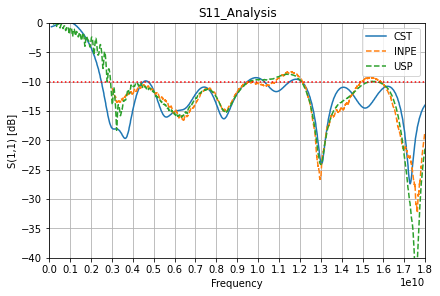

In [26]:
highest_freq = max([max(df_cst['freq']),max(df_ads['freq'])])


figure(figsize=(15, 12), dpi=300)
fig, ax = plt.subplots( layout = 'constrained')
# ax.plot(df_ads['freq'], df_ads['S11_ADS'], label ='ADS')
ax.plot(df_cst['freq'], df_cst['S11_CST'], label ='CST')
ax.plot(df_medida['freq'], df_medida['S11_MeasINPE'], '--',label ='INPE',)
# ax.plot(df_medida2['freq'], df_medida2['S11_Meas2'], label ='Medida 2')
# ax.plot(df_medida2['freq'], df_medida2['S11_MeasUSP'], '--',label ='USP 1',)
ax.plot(df_medida3['freq'], df_medida3['S11_MeasUSP2'],'--', label ='USP')

plt.axhline(y=-10, ls=':', c='r') #Horizontal Line
plt.xticks(range(0, 19*10**9, 1*10**9)) #x scale
ax.set_xlabel('Frequency')  # Add an x-label to the axes.
ax.set_ylabel('S(1,1) [dB]')  # Add a y-label to the axes.
ax.set_title('S11_Analysis')  # Add a title to the axes.
ax.set(xlim=(0, highest_freq), ylim=(-40, 0))
ax.grid()
ax.legend()

<Figure size 3000x2400 with 0 Axes>

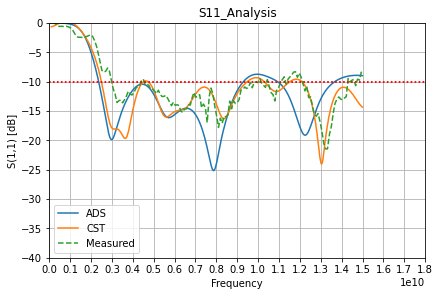

In [12]:
highest_freq = max([max(df_cst['freq']),max(df_ads['freq'])])


figure(figsize=(15, 12), dpi=200)
fig, ax = plt.subplots( layout = 'constrained')
ax.plot(df['freq'], df['S11_ADS'], label ='ADS')
ax.plot(df['freq'], df['S11_CST'], label ='CST')
ax.plot(df['freq'], df['S11_Meas1'], '--',label ='Measured',)
ax.axhline(y=-10, ls=':', color = 'r')


plt.axhline(y=-10, ls=':', c='r') #Horizontal Line
plt.xticks(range(0, 19*10**9, 1*10**9)) #x scale
ax.set_xlabel('Frequency')  # Add an x-label to the axes.
ax.set_ylabel('S(1,1) [dB]')  # Add a y-label to the axes.
ax.set_title('S11_Analysis')  # Add a title to the axes.
ax.set(xlim=(0, highest_freq), ylim=(-40, 0))
ax.grid()
ax.legend()

In [13]:
xl = pd.ExcelFile('S11_ADS.xlsx')
sh_names = xl.sheet_names

for name in sh_names:
    print (name)

Sierpinski_simetric
Sierp_Patch_3rd
Sierp_Patch_2rd
MLIN_Slot_Circular
MLIN_Disc_Monopole
MLIN_Disc_Monopole_FEM
MLIN_Cardioid_Monopole
Log_P_Koch_Param_1
Koch_simetric
fit_67
CPW_Disc_Monopole
CPW_Disc_Monopole_FEM
CPW_Cardioid_Monopole
Bowtie_import
Planilha1
